In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
Airlines=pd.read_excel("Airlines+Data.xlsx")
Airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


<AxesSubplot:>

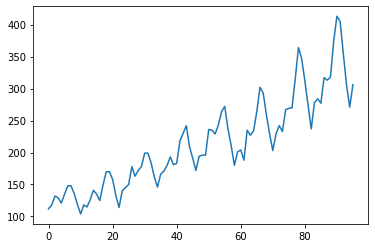

In [50]:
Airlines.Passengers.plot()

In [51]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [52]:
Airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [53]:
Airlines.rename(columns = {'Month' : 'date'}, inplace = True)
Airlines

,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [54]:

Airlines["month"] = Airlines.date.dt.strftime("%b") # month extraction
Airlines["year"] =Airlines.date.dt.strftime("%Y") # year extraction

In [55]:
Airlines

,date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [56]:
df=pd.get_dummies(Airlines['month'])
df

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Apr     96 non-null     uint8
 1   Aug     96 non-null     uint8
 2   Dec     96 non-null     uint8
 3   Feb     96 non-null     uint8
 4   Jan     96 non-null     uint8
 5   Jul     96 non-null     uint8
 6   Jun     96 non-null     uint8
 7   Mar     96 non-null     uint8
 8   May     96 non-null     uint8
 9   Nov     96 non-null     uint8
 10  Oct     96 non-null     uint8
 11  Sep     96 non-null     uint8
dtypes: uint8(12)
memory usage: 1.2 KB


In [58]:
df=df.iloc[:,[4,3,7,0,8,6,5,1,11,10,9,2]]
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,1,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,0,0,1,0


In [59]:
Airlines=pd.concat([Airlines,df],axis=1)
Airlines

,date,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
t_list=[x for x in range(1,len(Airlines)+1)]
Airlines['t']=t_list
Airlines['t_square']=Airlines['t']*Airlines['t'] 

#log_transformation

Airlines['log_passengers']=np.log10(Airlines.Passengers)

In [61]:
Airlines

,date,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_passengers
0,1995-01-01,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2.049218
1,1995-02-01,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,2.071882
2,1995-03-01,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,2.120574
3,1995-04-01,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,2.110590
4,1995-05-01,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.082785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,2.607455
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,2.550228
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,2.485721
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,2.432969


In [62]:
Airlines1=Airlines.iloc[:,1:]
Airlines1

,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_passengers
0,112,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2.049218
1,118,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,2,4,2.071882
2,132,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,3,9,2.120574
3,129,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4,16,2.110590
4,121,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,5,25,2.082785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,92,8464,2.607455
92,355,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,93,8649,2.550228
93,306,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,94,8836,2.485721
94,271,Nov,2002,0,0,0,0,0,0,0,0,0,0,1,0,95,9025,2.432969


<AxesSubplot:xlabel='month', ylabel='year'>

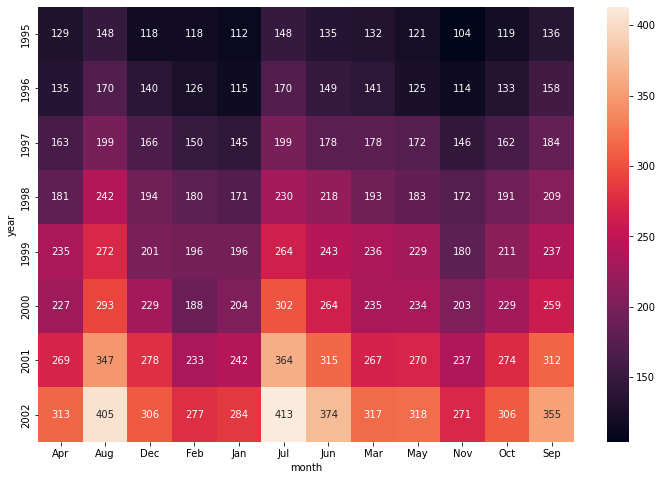

In [63]:
plt.figure(figsize=(12,8))
heatmap_y_year=pd.pivot_table(data=Airlines1,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_y_year
sns.heatmap(heatmap_y_year,annot=True,fmt="g")   # fmt is the formet of grid value

<AxesSubplot:xlabel='month', ylabel='Passengers'>

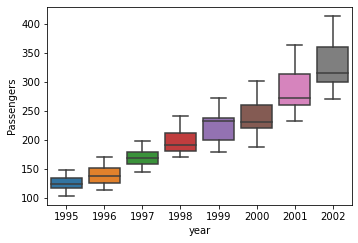

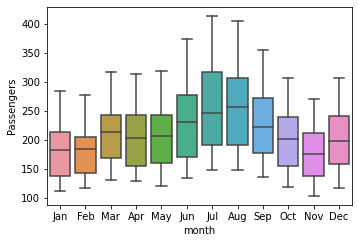

In [64]:
#Boxplot For ever
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x="year",y="Passengers",data=Airlines1)
plt.figure(figsize=(12,8))
plt.subplot(221)
sns.boxplot(x="month",y="Passengers",data=Airlines1)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

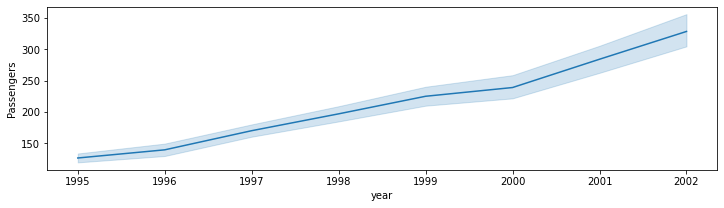

In [65]:
plt.figure(figsize=(12,3))
sns.lineplot(x='year',y='Passengers',data=Airlines1)

In [66]:
#Divide data into Tow part Train and test
from sklearn.model_selection import train_test_split
train,test=train_test_split(Airlines1,test_size=0.25)

In [67]:
#Linear model
import statsmodels.formula.api as smf
li_model=smf.ols('Passengers~t',data=train).fit()
pred_linear=pd.Series(li_model.predict(pd.DataFrame(test['t']))) 
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

28.62680693088593

In [85]:
#exponential
Exp = smf.ols('log_passengers~t', data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Exp)))**2))

rmse_Exp

198.4787063495137

In [73]:
#Quadrateric
Quad=smf.ols('Passengers~t+t_square',data=train).fit()
pred_quad=pd.Series(Quad.predict(pd.DataFrame(test[["t","t_square"]])))
rmse_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_quad))**2)) 
rmse_quad

28.48629171160971

In [74]:
# Additive seasonality model
Add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea=pd.Series(Add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2)) 
rmse_add_sea

69.72524852273435

In [75]:
# Additive Seasonality Quadratic model

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep',
                                                         'Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))

rmse_add_sea_quad

17.185301404150497

In [78]:
##Multiplicative Seasonality
Mult_sea=smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mult_sea=pd.Series(Mult_sea.predict(test))
rmse_mult_sea=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2)) 
rmse_mult_sea

198.4125548054099

In [82]:
# Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

198.447038490795

In [86]:
#Compare the results 

data={"Model":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)

table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
4,rmse_add_sea_quad,1.718530e+01
2,rmse_quad,2.848629e+01
0,rmse_linear,2.862681e+01
3,rmse_add_sea,6.972525e+01
5,rmse_mult_sea,1.984126e+02
6,rmse_Mult_add_sea,1.984470e+02
1,rmse_exp,1.557932e+129


# Additive Seasonality Quadratic model' has the least value of RMSE among the models prepared

In [88]:
predict_data=Airlines1.iloc[60:80,:]
predict_data

,Passengers,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_passengers
60,204,Jan,2000,1,0,0,0,0,0,0,0,0,0,0,0,61,3721,2.309630
61,188,Feb,2000,0,1,0,0,0,0,0,0,0,0,0,0,62,3844,2.274158
62,235,Mar,2000,0,0,1,0,0,0,0,0,0,0,0,0,63,3969,2.371068
63,227,Apr,2000,0,0,0,1,0,0,0,0,0,0,0,0,64,4096,2.356026
64,234,May,2000,0,0,0,0,1,0,0,0,0,0,0,0,65,4225,2.369216
65,264,Jun,2000,0,0,0,0,0,1,0,0,0,0,0,0,66,4356,2.421604
66,302,Jul,2000,0,0,0,0,0,0,1,0,0,0,0,0,67,4489,2.480007
67,293,Aug,2000,0,0,0,0,0,0,0,1,0,0,0,0,68,4624,2.466868
68,259,Sep,2000,0,0,0,0,0,0,0,0,1,0,0,0,69,4761,2.413300
69,229,Oct,2000,0,0,0,0,0,0,0,0,0,1,0,0,70,4900,2.359835


In [91]:
predict_data=predict_data.drop(columns=['Passengers','log_passengers','year'])

In [89]:
model_full =  smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airlines).fit()
model_full

In [92]:
pred_new=pd.Series(add_sea_Quad.predict(predict_data))
pred_new

60    218.825647
61    204.548544
62    248.520939
63    242.767312
64    241.068964
65    275.308253
66    299.158359
67    304.374470
68    269.860372
69    241.115218
70    222.909902
71    242.119243
72    252.909984
73    238.926617
74    283.192749
75    277.732859
76    276.328247
77    310.861272
78    335.005115
79    340.514963
dtype: float64

In [93]:
predict_data['Forcast_Passenger']=pd.Series(pred_new)

In [94]:
predict_data

,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,Forcast_Passenger
60,Jan,1,0,0,0,0,0,0,0,0,0,0,0,61,3721,218.825647
61,Feb,0,1,0,0,0,0,0,0,0,0,0,0,62,3844,204.548544
62,Mar,0,0,1,0,0,0,0,0,0,0,0,0,63,3969,248.520939
63,Apr,0,0,0,1,0,0,0,0,0,0,0,0,64,4096,242.767312
64,May,0,0,0,0,1,0,0,0,0,0,0,0,65,4225,241.068964
65,Jun,0,0,0,0,0,1,0,0,0,0,0,0,66,4356,275.308253
66,Jul,0,0,0,0,0,0,1,0,0,0,0,0,67,4489,299.158359
67,Aug,0,0,0,0,0,0,0,1,0,0,0,0,68,4624,304.374470
68,Sep,0,0,0,0,0,0,0,0,1,0,0,0,69,4761,269.860372
69,Oct,0,0,0,0,0,0,0,0,0,1,0,0,70,4900,241.115218
